In [1]:
import mysql.connector
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import calendar
import datetime
from datetime import timedelta
import mysql
ColourValues = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9' ,'k', 'k', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7','C0', 'C1', 'C2', 'C3'];

C:\Users\master\Anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


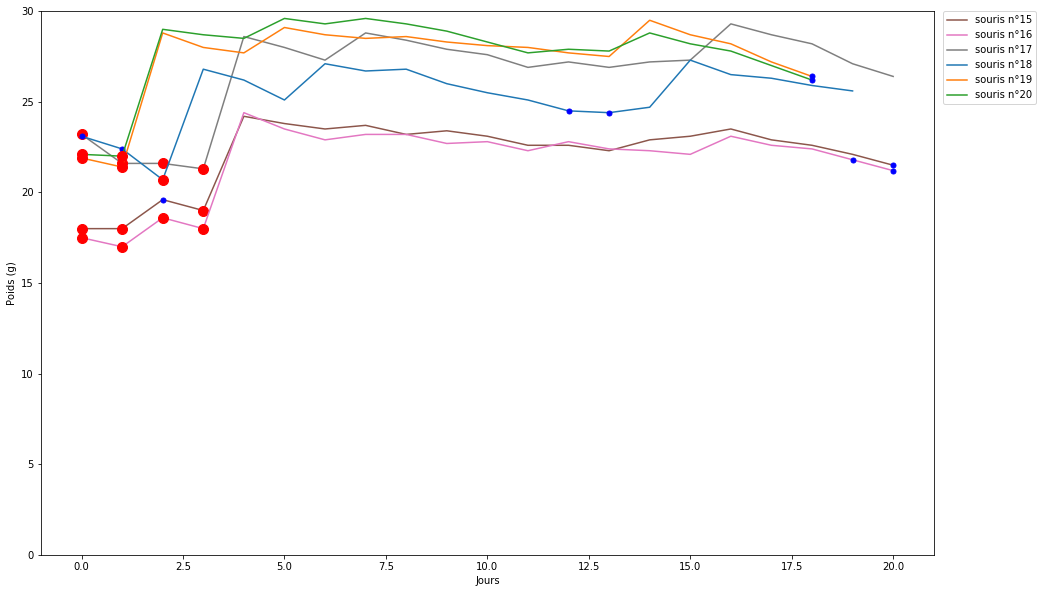

In [2]:
cnx = mysql.connector.connect(host="157.136.60.198",user="RedCentral",passwd="21User*91!",db="maze")

List3=[]

plt.figure(figsize=(16, 10))

Mouses = [15,16,17,18,19,20]

targetzone = 0.90
dangerZone = 0.80

for I in Mouses:
#    print(I)
    cursor = cnx.cursor()
    query = ("""SELECT weight FROM mouse_calendar mc
                INNER JOIN mouses mo ON mc.mouses_id=mo.mouses_id
                WHERE mo.mouse_number = %s AND mc.weight IS NOT NULL AND mc.deprivation_state = 1
                ORDER BY mc.calendar_date asc;""")
    Add=(I,)
    cursor.execute(query, Add)
    result=cursor.fetchall()
    cursor.close()
    List=[y for x in result for y in x]
#    print(List)
    
    if I == 4 :
        plt.plot(List[0:19],label="souris n°{}".format(str(I)),color=ColourValues[I])
    elif I == 10 :
        plt.plot(List[0:19],'--',label="souris n°{}".format(str(I)),color=ColourValues[I])
    elif I == 11 :
        plt.plot(List[0:19],'--',label="souris n°{}".format(str(I)),color=ColourValues[I])
    else:
        plt.plot(List,label="souris n°{}".format(str(I)),color=ColourValues[I])
        MaxWeight = max(List)
        NanList80 = np.copy(List)
        NanList90 = np.copy(List)
        index = 0
        for I in (List): 
            if I <= dangerZone * MaxWeight :
                NanList90[index] = np.nan
            elif I < targetzone * MaxWeight and I > dangerZone * MaxWeight :
                NanList80[index] = np.nan
            elif I >= targetzone * MaxWeight:
                NanList80[index] = np.nan
                NanList90[index] = np.nan
                
            else : 
                NanList80[index] = np.nan
                NanList90[index] = np.nan
            
            
            index = index +1
            
        plt.plot(NanList80,'o',markersize = 10,color='r')
        plt.plot(NanList90,'o',markersize = 5,color='b')
        
    
    if I == 10 :
        ListSave1 = List
       
    if I == 11 :
        ListSave2 = List

#for J in range(len(List)):

    #List3.append(   (   (   (ListSave1[J]+ListSave2[J]) / 2) / 100 )  *  80 )    
    

#plt.plot(List3, '--', label= "80% of controls")
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
plt.xlabel('Jours')
plt.ylabel('Poids (g)')
plt.ylim([0,30])
plt.savefig(r'C:\Users\master\OwncloudTim\Professionnel\ThèseUNIC\Resultats\Comportement\PoidsSouris\BatchSFiber\CourbesPoids.png', facecolor='w', edgecolor='w',
        orientation='paysage', format='png',
        transparent=True)
    
    
plt.show()
